<a href="https://colab.research.google.com/github/RagaaM/Machine-learning/blob/main/KNN_internet_firewall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [134]:
df = pd.read_csv("/content/drive/MyDrive/log2.csv")
Action = {'drop':0, 'allow': 1,'deny':2, 'reset-both':3}
df.Action = [Action[item] for item in df.Action]
target = df.Action

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


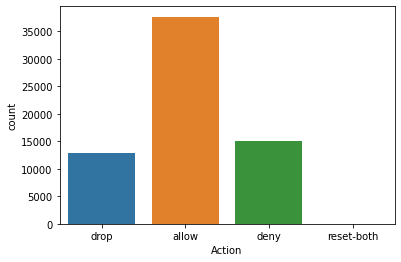

1    37640
2    14987
0    12851
3       54
Name: Action, dtype: int64


In [135]:
# visualize the target variable
g = sns.countplot(df['Action'])
g.set_xticklabels(['drop','allow','deny','reset-both'])
plt.show()
# dataset['Action'].describe()
print(target.value_counts())

In [136]:
y = df['Action'].values
y = y.reshape(-1,1)
X_data = df.drop(['Action'],axis = 1)
X_data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,177,94,83,2,30,1,1
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,314,192,122,6,15,4,2
65528,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,70,70,0,1,0,1,0
65530,54870,445,0,0,70,70,0,1,0,1,0


In [137]:
# # Separate classes
# Action_drop = dataset[dataset['Action'] == 0]
# Action_allow = dataset[dataset['Action'] == 1]
# Action_deny = dataset[dataset['Action'] == 2]
# Action_reset_both = dataset[dataset['Action'] == 3]

In [138]:
from sklearn.utils import resample

class_0=df[df['Action']==0]
class_1=df[df['Action']==1]
class_2=df[df['Action']==2]
class_3=df[df['Action']==3]
df = pd.concat([class_1, class_2, class_3, class_0])

class_0_resample = resample(class_0, n_samples = 10000, replace = True, random_state = 42)
class_1_resample = resample(class_1, n_samples = 10000, replace = True, random_state = 42)
class_2_resample = resample(class_2, n_samples = 10000, replace = True, random_state = 42)
class_3_resample = resample(class_3, n_samples = 10000, replace = True, random_state = 42)
df = pd.concat([class_1_resample, class_2_resample, class_3_resample, class_0_resample])
df.shape

(40000, 12)

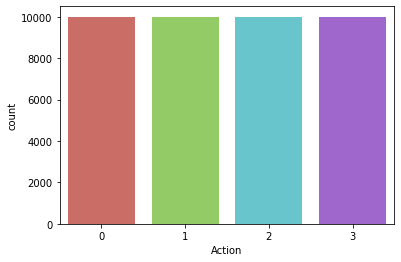

In [139]:
sns.countplot(x='Action',data=df,palette='hls')
plt.show()

In [140]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
28491,49307,443,35042,443,1,245382,6838,238544,214,31,44,170
1567,61119,53,61119,53,1,217,90,127,2,29,1,1
20418,49556,443,19377,443,1,198375,6279,192096,205,153,69,136
12051,51652,80,52729,80,1,32942,2548,30394,58,255,28,30
30229,49228,53,7287,53,1,193,102,91,2,30,1,1


In [141]:
#normalize data
X = (X_data - np.min(X_data)) / (np.max(X_data) / np.min(X_data)).values
X.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0.0,0.0,0.0,0.0,0.000006,0.000002,0.0,9.651429e-07,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000223,0.000097,0.0,1.737257e-05,0.0,0.000012,0.0
2,0.0,0.0,0.0,0.0,0.000008,0.000004,0.0,9.651429e-07,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000154,0.000087,0.0,1.351200e-05,0.0,0.000009,0.0
4,0.0,0.0,0.0,0.0,0.001196,0.000425,0.0,2.895429e-05,0.0,0.000016,0.0


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state= 42)
# X_train, X_test, y_train, y_test = train_test_split(X_resampled,target_resampled,test_size=0.25,random_state= 42)
print("X_train",X.shape)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (65532, 11)
X_train (49149, 11)
X_test (16383, 11)
y_train (49149, 1)
y_test (16383, 1)


In [143]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [144]:
y_pred = classifier.predict(X_test)

In [145]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3190    0    0    0]
 [ 333 9038   56    0]
 [1230   21 2505    0]
 [   0    0    7    3]]


In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      3190
           1       1.00      0.96      0.98      9427
           2       0.98      0.67      0.79      3756
           3       1.00      0.30      0.46        10

    accuracy                           0.90     16383
   macro avg       0.91      0.73      0.76     16383
weighted avg       0.93      0.90      0.90     16383



In [147]:
# Calculating the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print("Accuracy = ", accuracy)

Accuracy =  89.94689617286211


Text(0.5, 257.44, 'Predicted label')

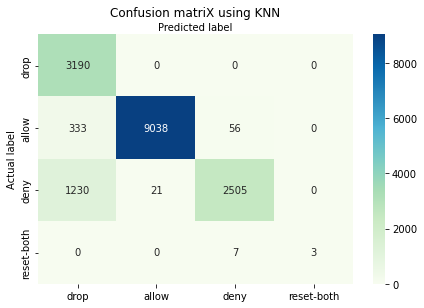

In [148]:
fig, ax = plt.subplots()
labels=['drop','allow','deny','reset-both']

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="GnBu" ,fmt='g', xticklabels = labels, yticklabels = labels)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matriX using KNN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')